In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Features

Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleol,Mitoses,Class:  

In [2]:
feature_name=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleol','Mitoses','Class']

In [3]:
df=pd.read_csv('data.csv')
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [4]:
df.shape

(569, 33)

In [5]:
#Checking the ratio of the types in diagnosis variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#Checkig for nulll data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Q1

In [8]:
# Fixing the data and the target
data=df.drop(columns=['Unnamed: 32','diagnosis'])
target=df['diagnosis']

In [9]:
#Scaling the datasets
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

# Q2

Converting to 3d data using PCA

In [10]:
#Applying PCA for dimension reduction
pca = PCA(n_components=3)
pca.fit(scaled_data)
trans_data=pca.transform(scaled_data)

In [11]:
print(trans_data.shape)

(569, 3)


<ipython-input-12-8471240d9ad8>:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(trans_data[:,0],trans_data[:,1],c=target)


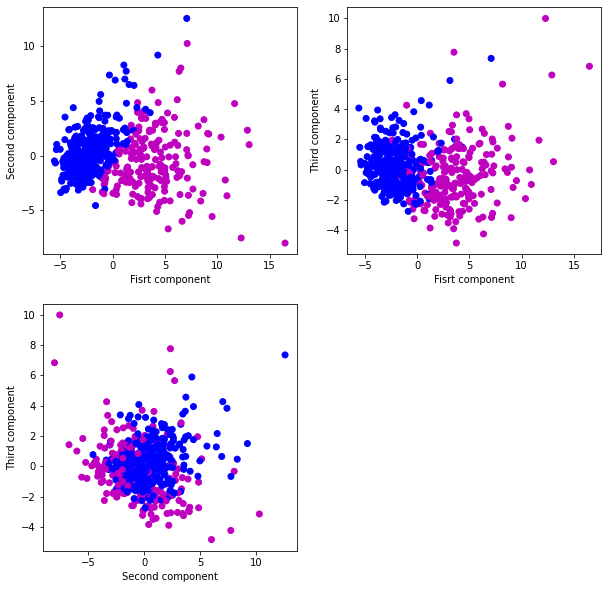

In [12]:
# Visulaizing the data

plt.figure(figsize=(10,10))
#First vs second
plt.subplot(221)
plt.scatter(trans_data[:,0],trans_data[:,1],c=target)
plt.xlabel('Fisrt component')
plt.ylabel('Second component')

#First vs Third
plt.subplot(222)
plt.scatter(trans_data[:,0],trans_data[:,2],c=target)
plt.xlabel('Fisrt component')
plt.ylabel('Third component')

#First vs Third
plt.subplot(223)
plt.scatter(trans_data[:,1],trans_data[:,2],c=target)
plt.xlabel('Second component')
plt.ylabel('Third component')

plt.show()

We can clearly male that in the First vs. Second plot the data points form some group ,which is clearly visisble , Therefore 2d dimentionality would work fine

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([-2.22924851, -1.54113476, -0.85302101, -0.16490726,  0.52320649,
         1.21132023,  1.89943398,  2.58754773,  3.27566148,  3.96377523,
         4.65188898]),
 <a list of 10 Patch objects>)

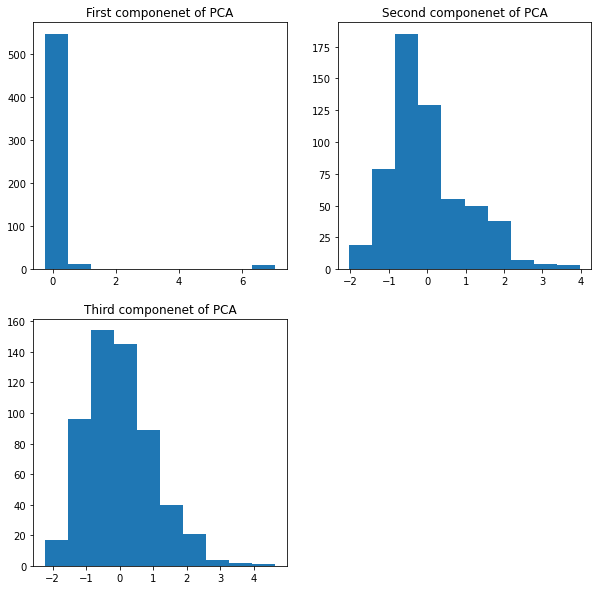

In [13]:
x=scaled_data[:,0]
y=scaled_data[:,1]
z=scaled_data[:,2]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('First componenet of PCA')
plt.hist(x)
plt.subplot(222)
plt.title('Second componenet of PCA')
plt.hist(y)
plt.subplot(223)
plt.title('Third componenet of PCA')
plt.hist(z)

Here we can see that the histogram of 2nd and the 3rd component of PCA will overlap , while that of 1st with 2nd and 3rd will not overlap that much and it is more good with the 1st and 2nd one

# Q3

Now we apply k-means clustering

In [14]:
k_means=KMeans(n_clusters=2)
pred_clusters=k_means.fit_predict(trans_data)

In [15]:
#.inertia_ will give the sum of sqaured error (i.e sum of the squared of all the data points from the centroid)
k_means.inertia_

6943.226733432991

Now lets see for which K it performs the best by plotting a curve between the SSE(sum of squared error) and K

In [16]:
k=[2,3,5]
error_list=[]
for k_val in k:
    k_means=KMeans(n_clusters=k_val)
    k_means.fit_predict(trans_data)
    error_list.append(k_means.inertia_)

In [17]:
pd.DataFrame(error_list,k)

,0
2,6943.226733
3,5439.664120
5,4068.296942


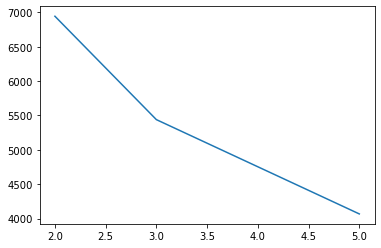

In [18]:
plt.plot(k,error_list)

Keeping in mind the elbow rule we can see that at K=3 the SSE error is less

### Now lets visualize the data and the centroid using k=3

In [19]:
k_means=KMeans(n_clusters=2)
pred_clusters=k_means.fit_predict(trans_data)
centers=k_means.cluster_centers_

In [24]:
df_new=pd.DataFrame(trans_data,columns=['col1','col2','col3'])
df_new['clusters']=pred_clusters
df_new.head()

,col1,col2,col3,clusters
0,9.183200,1.971271,-1.171625,0
1,2.383298,-3.753459,-0.580229,0
2,5.742472,-1.080350,-0.533088,0
3,7.124384,10.272225,-3.150161,0
4,3.945694,-1.959689,1.401177,0


In [21]:
data0=df_new[df_new['clusters']==0]
data1=df_new[df_new['clusters']==1]
# data2=df_new[df_new['clusters']==2]

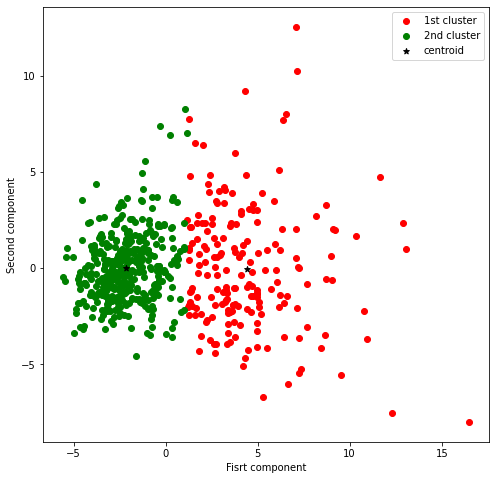

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(data0['col1'],data0['col2'],color='red',label='1st cluster')
plt.scatter(data1['col1'],data1['col2'],color='green',label='2nd cluster')
# plt.scatter(data2['col1'],data2['col2'],color='blue',label='3rd cluster')
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black',label='centroid')
plt.xlabel('Fisrt component')
plt.ylabel('Second component')
plt.legend()

In [29]:
df_new['clusters']=np.where(df_new['clusters']==1,'B','M')

In [32]:
df_new['clusters'].value_counts()

B    380
M    189
Name: clusters, dtype: int64